# iDigBio Cephalopoda

## Let's get into the weeds with this data!

So....what do we do with this information?

In this notebook, we will:
1.
2.
3.

In [15]:
import idigbio
import pandas as pd
from IPython.display import Image
from pathlib import Path
import matplotlib.pyplot as plt

Import all this stuff!

In [16]:
api = idigbio.pandas()
output = api.search_records()
api_json = idigbio.json()
json_output = api.search_records()

This is from our last two notebooks -- just downloading the data with the API. We will discuss how effective this is later....

I wanted to look at my favorite kinds of animals (which is unfortunately not bears)--cephalopods! Let's start with what we know....

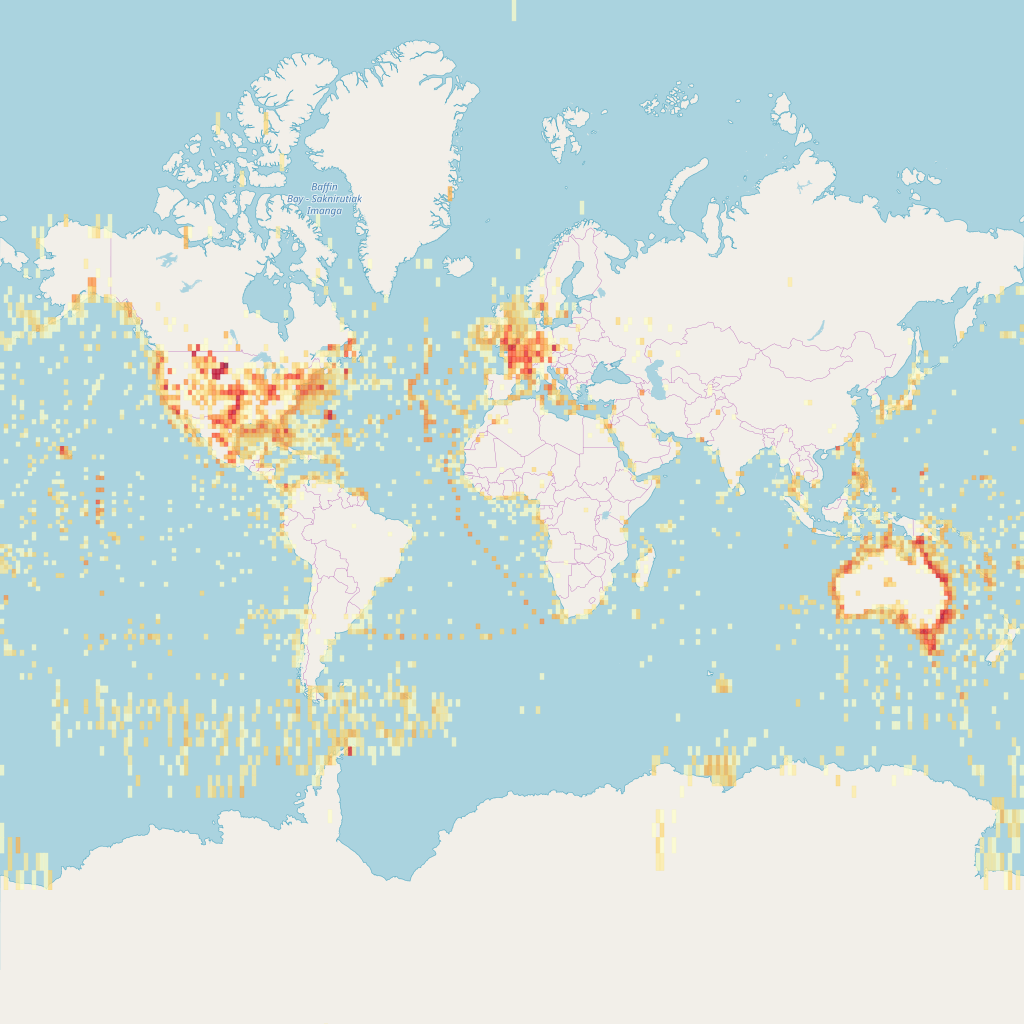

In [17]:
m = api_json.create_map(rq={"class": "cephalopoda"}, t="geohash") #Creating the map
m.save_map_image("../images/cephalopods", 2) #Saving it to the right folder
Image(filename = "../images/cephalopods.png") #Opening it

Okay. We have this beautiful map, but one of the limitations of the iDigBio API is that you can't do much beyond creating pretty maps. So let's dig into the data themselves....with pandas. 

In [18]:
fossils = api.search_records(rq = {"class": {"type": "exists", "value": "cephalopoda"},
                           "basisofrecord": {"type": "exists", "value": "fossilspecimen"}}, limit = 100)
fossils.head()

,basisofrecord,bed,catalognumber,class,collectioncode,collector,continent,coordinateuncertainty,country,countrycode,...,recordset,scientificname,specificepithet,startdayofyear,stateprovince,taxonomicstatus,taxonrank,typestatus,verbatimeventdate,verbatimlocality
uuid,,,,,,,,,,,,,,,,,,,,,
061594f4-69a3-41ff-9396-dac55cc8409b,fossilspecimen,NaN,66079,gastropoda,invertebrate paleontology,david nunnallee,north america,5566.0,united states,usa,...,ba77d411-4179-4dbd-b6c1-39b8a71ae795,"parvisipho lewisiana (weaver), 1912",lewisiana,281,washington,NaN,species,NaN,1967-1970,NaN
98d15126-9c7b-49b9-8ab9-04c449184867,fossilspecimen,NaN,66078,gastropoda,invertebrate paleontology,david nunnallee,north america,5566.0,united states,usa,...,ba77d411-4179-4dbd-b6c1-39b8a71ae795,parvisipho sp.,sp.,281,washington,NaN,genus,NaN,1967-1970,NaN
d3747526-4aa9-4193-8864-1eb10c090f9a,fossilspecimen,bear gulch limestone,035520,holocephali,vertpaleo,richard lund & party,north america,NaN,united states,usa,...,71b8ffab-444e-43f9-9a9c-5c42b0eaa5eb,srianta dawsoni,dawsoni,179,montana,NaN,species,y,NaN,"usa | montana | supercrop quarry, mv7106"
bd20e1ec-0263-46ca-b492-73e3c45cf623,fossilspecimen,NaN,66091,gastropoda,invertebrate paleontology,david nunnallee,north america,5566.0,united states,usa,...,ba77d411-4179-4dbd-b6c1-39b8a71ae795,"whitneyella buwaldana (dickerson), 1915",buwaldana,281,washington,NaN,species,NaN,67-69,NaN
8b1f86b8-2a57-4f9b-a8ae-6208af69c3de,fossilspecimen,bear gulch limestone,046092,holocephali,vertpaleo,richard lund,north america,NaN,united states,usa,...,71b8ffab-444e-43f9-9a9c-5c42b0eaa5eb,netsepoye hawesi,hawesi,179,montana,NaN,species,y,NaN,"usa | montana | supercrop quarry, mv7106"


What I'm doing up there is asking the API to retrieve records which have data under "class," and those whose "class" is "cephalopoda," and records that have a value for "basisofrecord," which is either "fossilspecimen" or "preservedspecimen," and we want "fossilspecimen"s. So, hopefully, this should return all cephalopod fossil records.

But if you look through this data....it's not quite that. 

We have records whose class is "holocephali" and "elasmobranchii"--cartilaginous fish. Also, there are records for which "basisofrecord" is "preservedspecimen". 

So the API isn't entirely reliable. But thankfully, we have another way to access this info. I went back to the iDigBio GUI and downloaded two datasets: I specified fossil cephalopods and preserved cephalopods. 

(insert the images of the GUI -- have to stitch them together)

These ones are correct! I don't know why the API doesn't want to cooperate with these search results, but hopefully it'll get fixed. Until then, manually downloading the datasets is a solid workaround.

Let's look at the data.

In [19]:
preserved_pd = pd.read_csv("../data/occurrence_pres.csv")
preserved_pd.head()

/Users/OliviaDowns/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,4,22,32,34,36,40,47,48,49,50,51,54,58,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,coreid,idigbio:associatedsequences,idigbio:barcodeValue,dwc:basisOfRecord,dwc:bed,gbif:canonicalName,dwc:catalogNumber,dwc:class,dwc:collectionCode,dwc:collectionID,...,dwc:stateProvince,dwc:taxonID,dwc:taxonomicStatus,dwc:taxonRank,dwc:typeStatus,idigbio:uuid,dwc:verbatimEventDate,dwc:verbatimLocality,idigbio:version,dwc:waterBody
0,980e2638-d9e1-428b-a6b2-4f87e25c63ba,NaN,NaN,preservedspecimen,NaN,sepia officinalis,l979/3966,cephalopoda,evertebrata,NaN,...,NaN,2290849,accepted,species,NaN,980e2638-d9e1-428b-a6b2-4f87e25c63ba,NaN,NaN,NaN,NaN
1,d21a35f2-2daa-49b4-8e69-3832bb80b481,NaN,NaN,preservedspecimen,NaN,doryteuthis pealeii,11998,cephalopoda,ncsm-unio,NaN,...,north carolina,5855960,accepted,species,NaN,d21a35f2-2daa-49b4-8e69-3832bb80b481,NaN,[body of water and air mileage added 10 jun 20...,NaN,NaN
2,a3ff5c7c-396c-4762-9a17-ef1fb7f914e2,NaN,NaN,preservedspecimen,NaN,sepia hedleyi,e14250,cephalopoda,invertebrates,NaN,...,tasmania,2290767,accepted,species,NaN,a3ff5c7c-396c-4762-9a17-ef1fb7f914e2,NaN,NaN,NaN,NaN
3,c45273db-c706-46da-b1c3-3fe3be363c4a,NaN,NaN,preservedspecimen,NaN,sepia braggi,e1616,cephalopoda,invertebrates,NaN,...,tasmania,2290796,accepted,species,NaN,c45273db-c706-46da-b1c3-3fe3be363c4a,NaN,NaN,NaN,NaN
4,176bdedc-b943-4314-a227-32663d2f7a1c,NaN,NaN,preservedspecimen,NaN,octopus warringa,e16624,cephalopoda,invertebrates,NaN,...,tasmania,2289517,accepted,species,NaN,176bdedc-b943-4314-a227-32663d2f7a1c,NaN,NaN,NaN,NaN


In [20]:
fossil_pd = pd.read_csv("../data/occurrence_foss.csv")

/Users/OliviaDowns/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (23,34,37,38,40,48,52,54,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Much better! All cephalopods, all preserved. And fossils, in the right places. 

But it's messy. So I cleaned it up. 

In [21]:
p = preserved_pd[['dwc:basisOfRecord', 'gbif:canonicalName','dwc:catalogNumber', 'dwc:class','dwc:vernacularName', 
              'dwc:continent','dwc:country','dwc:eventDate','dwc:family','dwc:genus', 'idigbio:geoPoint', 
              'dwc:higherClassification','dwc:institutionCode','dwc:kingdom', 
              'dwc:locality','dwc:order', 'dwc:phylum','dwc:scientificName', 'dwc:startDayOfYear']]

p_map = p.dropna(axis = 0, subset = ["idigbio:geoPoint"])
p_map.columns = ["Basis of Record", "Canonical Name", "Cat. Num.", "Class", "Vernacular Name", "Continent", "Country",
                "Date", "Family", "Genus", "GeoPoint", "Higher Class.", "Inst. Code", "Kingdom", "Locality", "Order",
                "Phylum", "Sci. Name", "Day of Year"]

f = fossil_pd[['dwc:basisOfRecord', 'gbif:canonicalName','dwc:catalogNumber', 'dwc:class','dwc:vernacularName', 
              'dwc:continent','dwc:country','dwc:eventDate','dwc:family','dwc:genus', 'idigbio:geoPoint', 
              'dwc:higherClassification','dwc:institutionCode','dwc:kingdom', 
              'dwc:locality','dwc:order', 'dwc:phylum','dwc:scientificName', 'dwc:startDayOfYear']]
f_map = f.dropna(axis = 0, subset = ["idigbio:geoPoint"])
f_map.columns = ["Basis of Record", "Canonical Name", "Cat. Num.", "Class", "Vernacular Name", "Continent", "Country",
                "Date", "Family", "Genus", "GeoPoint", "Higher Class.", "Inst. Code", "Kingdom", "Locality", "Order",
                "Phylum", "Sci. Name", "Day of Year"]
p_map.head()

,Basis of Record,Canonical Name,Cat. Num.,Class,Vernacular Name,Continent,Country,Date,Family,Genus,GeoPoint,Higher Class.,Inst. Code,Kingdom,Locality,Order,Phylum,Sci. Name,Day of Year
1,preservedspecimen,doryteuthis pealeii,11998,cephalopoda,longfin inshore squid,north america,united states,NaN,loliginidae,doryteuthis,"{""lat"": 32.8667, ""lon"": -77.4}",NaN,ncsm,animalia,"[atlantic ocean off north carolina], approxima...",myopsida,mollusca,doryteuthis pealeii,178.0
2,preservedspecimen,sepia hedleyi,e14250,cephalopoda,NaN,australia,australia,1965-02-10,sepiidae,sepia,"{""lat"": -41.8681, ""lon"": 148.2946}",NaN,tmag,animalia,bicheno: cod rock,sepiida,mollusca,sepia hedleyi,41.0
3,preservedspecimen,sepia braggi,e1616,cephalopoda,NaN,australia,australia,NaN,sepiidae,sepia,"{""lat"": -41.1625, ""lon"": 146.3563}",NaN,tmag,animalia,north coast of tasmania (unlocalised),sepiida,mollusca,sepia braggi,NaN
4,preservedspecimen,octopus warringa,e16624,cephalopoda,NaN,australia,australia,1984-03-29,octopodidae,octopus,"{""lat"": -42.169, ""lon"": 148.2715}",NaN,tmag,animalia,great oyster bay: promise bay,octopoda,mollusca,octopus warringa,89.0
5,preservedspecimen,grimpoteuthis discoveryi,e16625,cephalopoda,NaN,australia,australia,1985-06-01,grimpoteuthidae,grimpoteuthis,"{""lat"": -33.3833, ""lon"": 126.9333}",NaN,tmag,animalia,great australian bight: eyre: offshore to se (...,octopoda,mollusca,grimpoteuthis unplaced,152.0


Let's look at some of this data on a map. We'll use GeoPandas!

Installing GeoPandas can be very tricky. [Here](http://geopandas.org/install.html) are install instructions. I personally had problems installing, and ended up using the `git clone` option, and still had problems. I updated homebrew and installed spatialindex, and that worked. 

In [22]:
import geopandas
from shapely.geometry import Point

To start mapping, we need to have the data in the right format. Unfortunately, the lat/lon coordinates in this dataset are strings. So, I've written this program to extract the coordinates as the correct data type and zip them together, then create a new column for that data. 

In [23]:
def coordinate(df):
    inter = []
    nums = ["-", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "."]
    for row_cell in df.iloc[:,10]: 
        lat = []
        com = []
        lon = []
        for char in row_cell:
            if char in nums and com == []:
                lat += char
            elif char == ",":
                com += char
            elif char in nums and com != []:
                lon += char
            lat = ("".join(lat))    
            lon = ("".join(lon))
        inter += list(zip([float(lat)], [float(lon)]))
    df['Coordinates'] = inter
    #return float(lat)
    return df             
p_coo = coordinate(p_map)
f_coo = coordinate(f_map)

/Users/OliviaDowns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Beautiful. Now, implement the rest of [these](https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html) instructions for creating a GeoDataFrame (implementing Point)....

In [24]:
def make_me_a_gdf(df):
    df['Coordinates'] = df['Coordinates'].apply(Point)
    gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
    return gdf

gdf_p = make_me_a_gdf(p_coo)
gdf_f = make_me_a_gdf(f_coo)
gdf_p.head()

/Users/OliviaDowns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Basis of Record,Canonical Name,Cat. Num.,Class,Vernacular Name,Continent,Country,Date,Family,Genus,GeoPoint,Higher Class.,Inst. Code,Kingdom,Locality,Order,Phylum,Sci. Name,Day of Year,Coordinates
1,preservedspecimen,doryteuthis pealeii,11998,cephalopoda,longfin inshore squid,north america,united states,NaN,loliginidae,doryteuthis,"{""lat"": 32.8667, ""lon"": -77.4}",NaN,ncsm,animalia,"[atlantic ocean off north carolina], approxima...",myopsida,mollusca,doryteuthis pealeii,178.0,POINT (32.8667 -77.40000000000001)
2,preservedspecimen,sepia hedleyi,e14250,cephalopoda,NaN,australia,australia,1965-02-10,sepiidae,sepia,"{""lat"": -41.8681, ""lon"": 148.2946}",NaN,tmag,animalia,bicheno: cod rock,sepiida,mollusca,sepia hedleyi,41.0,POINT (-41.8681 148.2946)
3,preservedspecimen,sepia braggi,e1616,cephalopoda,NaN,australia,australia,NaN,sepiidae,sepia,"{""lat"": -41.1625, ""lon"": 146.3563}",NaN,tmag,animalia,north coast of tasmania (unlocalised),sepiida,mollusca,sepia braggi,NaN,POINT (-41.1625 146.3563)
4,preservedspecimen,octopus warringa,e16624,cephalopoda,NaN,australia,australia,1984-03-29,octopodidae,octopus,"{""lat"": -42.169, ""lon"": 148.2715}",NaN,tmag,animalia,great oyster bay: promise bay,octopoda,mollusca,octopus warringa,89.0,POINT (-42.169 148.2715)
5,preservedspecimen,grimpoteuthis discoveryi,e16625,cephalopoda,NaN,australia,australia,1985-06-01,grimpoteuthidae,grimpoteuthis,"{""lat"": -33.3833, ""lon"": 126.9333}",NaN,tmag,animalia,great australian bight: eyre: offshore to se (...,octopoda,mollusca,grimpoteuthis unplaced,152.0,POINT (-33.3833 126.9333)


Now, you'll have to install geoplot. 

Here's a little map to start:

In [25]:
import geopandas
from cartopy import crs as ccrs

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Ille